[Tutorial on jupyter, python, and data](https://www.dataquest.io/blog/jupyter-notebook-tutorial/)

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(style="darkgrid")


In [3]:
from numbers_parser import Document
doc = Document('../Pilot/User1_Exp-a.numbers')
sheets = doc.sheets
tables = sheets[0].tables
data = tables[0].rows(values_only=True)
df = pd.DataFrame(data[1:], columns=data[0])

sheets = doc.sheets
tables = sheets[0].tables
data = tables[0].rows(values_only=True)
df = pd.DataFrame(data[1:], columns=data[0])
df.tail()


,Trial,SoundSpeed,SoundAngle,MovSpeed,MovAngle,soundStart,startDragTime,endDragTime,randomHorizontalInterval,randomVerticalInterval
35,35.0,86.04930764326399,256.4049295471846,237.8280027814153,260.19750328475476,1.736414e+12,1.736414e+12,1.736414e+12,1483.1939200510637,358.687297606616
36,36.0,34.37437511797922,36.58915212707217,183.45996979490357,25.513870427534243,1.736414e+12,1.736414e+12,1.736414e+12,1086.9475086303248,1464.1551186463148
37,37.0,87.21569836729427,161.85415447074774,231.1988989811975,155.28682311953412,1.736414e+12,1.736414e+12,1.736414e+12,361.97703499455895,1104.4766468911434
38,38.0,33.91598641537253,47.94126233302006,256.6922216657068,30.613481021165853,1.736414e+12,1.736414e+12,1.736414e+12,1320.4195477932653,1191.3644555098053
39,39.0,35.52036727581414,307.8714857076208,137.49161973277964,337.813322106552,1.736414e+12,1.736414e+12,1.736414e+12,1375.7880557616363,1069.9225799593996


In [4]:
df.dtypes

Trial                        float64
 SoundSpeed                   object
 SoundAngle                   object
 MovSpeed                     object
 MovAngle                     object
 soundStart                  float64
 startDragTime               float64
 endDragTime                 float64
 randomHorizontalInterval     object
 randomVerticalInterval       object
dtype: object

In [5]:
df = pd.read_csv('../Pilot/User1_Exp-a.csv')
print(len(df))
df.tail()


40


,Trial,SoundSpeed,SoundAngle,MovSpeed,MovAngle,soundStart,startDragTime,endDragTime,randomHorizontalInterval,randomVerticalInterval
35,35,86.049308,256.404930,237.828003,260.197503,1736414268676,1736414272178,1736414272993,1483.193920,358.687298
36,36,34.374375,36.589152,183.459970,25.513870,1736414276993,1736414280263,1736414281326,1086.947509,1464.155119
37,37,87.215698,161.854154,231.198899,155.286823,1736414285327,1736414288538,1736414289376,361.977035,1104.476647
38,38,33.915986,47.941262,256.692222,30.613481,1736414293377,1736414297111,1736414297876,1320.419548,1191.364456
39,39,35.520367,307.871486,137.491620,337.813322,1736414301877,1736414309253,1736414310659,1375.788056,1069.922580


In [6]:
df.columns = ['trial', 'soundSpeed', 'soundAngle', 'movSpeed', 'movAngle', 'soundStart', 'startDragTime', 'endDragTime', 'hInterval', 'vInterval']

In [7]:
df.dtypes

trial              int64
soundSpeed       float64
soundAngle       float64
movSpeed         float64
movAngle         float64
soundStart         int64
startDragTime      int64
endDragTime        int64
hInterval        float64
vInterval        float64
dtype: object

(array([19.,  5.,  3.,  2.,  3.,  3.,  1.,  1.,  2.,  1.]),
 array([ 28.07947877,  42.65447795,  57.22947713,  71.80447631,
         86.37947549, 100.95447467, 115.52947385, 130.10447302,
        144.6794722 , 159.25447138, 173.82947056]),
 <BarContainer object of 10 artists>)

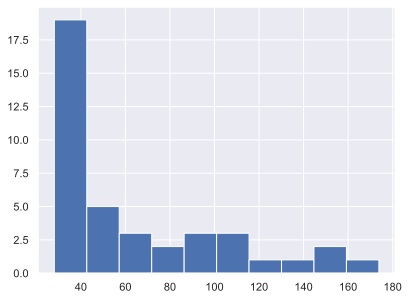

In [8]:
plt.hist(df.soundSpeed)

(array([4., 8., 1., 3., 5., 1., 4., 7., 2., 5.]),
 array([  8.97566187,  38.86524425,  68.75482663,  98.64440902,
        128.5339914 , 158.42357379, 188.31315617, 218.20273856,
        248.09232094, 277.98190332, 307.87148571]),
 <BarContainer object of 10 artists>)

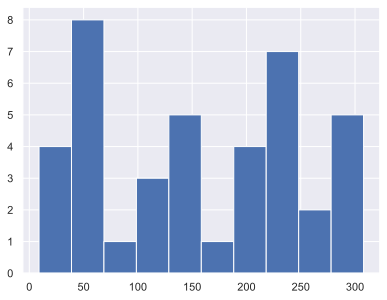

In [9]:
plt.hist(df.soundAngle)

In [10]:
errAngle = df.movAngle - df.soundAngle

Text(0.5, 1.0, 'start drag time as a function of angle error')

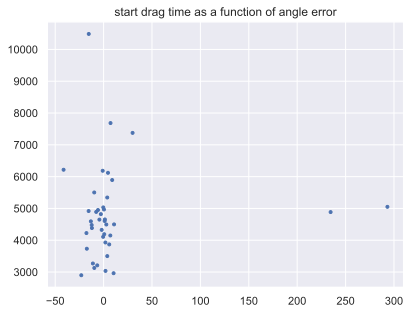

In [11]:
fig, ax = plt.subplots()
ax.plot(errAngle, df.startDragTime-df.soundStart, '.')
ax.set_title('start drag time as a function of angle error')
